<a href="https://colab.research.google.com/github/hardikcode-creator/EDA/blob/main/Linear_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("https://gist.githubusercontent.com/hardikcode-creator/eee2c0e452c8d9833bbb213a15961129/raw/bf95a2e30fceb9f2ae990eac8379fc7d844a0196/weight-height.csv")

In [6]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Text(0, 0.5, 'Height')

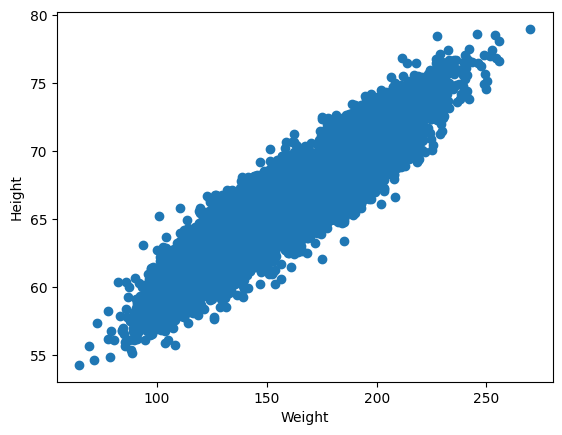

In [7]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [20]:
X=df.drop(columns=['Height',],axis=1)
Y=df['Height']
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
gender_encoding= encoder.fit_transform(df[['Gender']]).toarray()
gender_encoding=pd.DataFrame(gender_encoding,columns=encoder.get_feature_names_out())
X=pd.concat([X,gender_encoding],axis=1)
X.drop(columns=['Gender'], axis=1,inplace=True)

In [21]:
X

,Weight,Gender_Female,Gender_Male
0,241.893563,0.0,1.0
1,162.310473,0.0,1.0
2,212.740856,0.0,1.0
3,220.042470,0.0,1.0
4,206.349801,0.0,1.0
...,...,...,...
9995,136.777454,1.0,0.0
9996,170.867906,1.0,0.0
9997,128.475319,1.0,0.0
9998,163.852461,1.0,0.0


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [23]:
# standarize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Height')

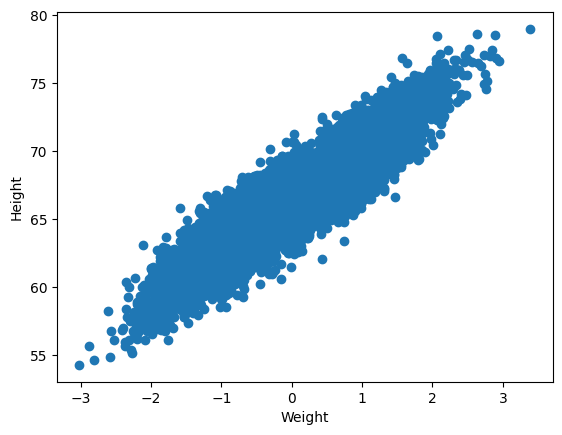

In [24]:
plt.scatter(X_train[:,0], Y_train)
plt.xlabel('Weight')
plt.ylabel('Height')

In [26]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [28]:
model.coef_

array([ 3.94638154,  0.24638985, -0.24638985])

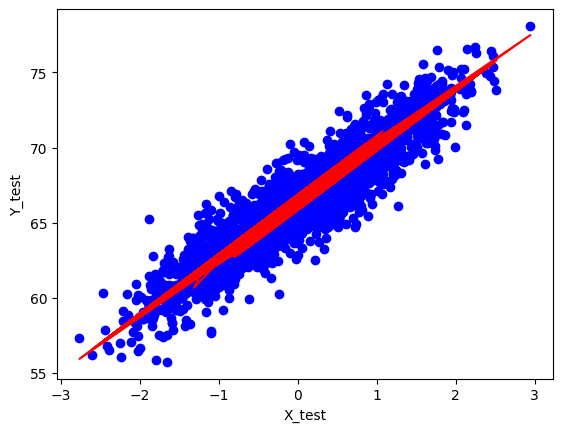

In [38]:
Y_prediction=model.predict(X_test)
plt.scatter(X_test[:,0],Y_test,color='blue')
plt.xlabel('X_test')
plt.ylabel('Y_test')
plt.plot(X_test[:,0],Y_prediction,color='red')

In [39]:
## Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(Y_test, Y_prediction)
mae = mean_absolute_error(Y_test, Y_prediction)
r2 = r2_score(Y_test, Y_prediction)
print(mse,mae,r2)

2.0472828942490433 1.1373984274269877 0.8621926450118504


In [41]:
from sklearn.metrics import r2_score
score=r2_score(Y_prediction,Y_test)
print(score)

0.8421360347591175


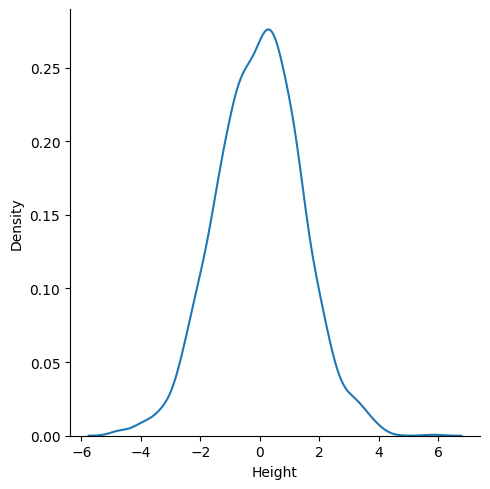

In [42]:
# residuals ---> must be normal distribution
residuals=Y_test-Y_prediction
sns.displot(residuals,kind='kde')